# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.

–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –°–µ–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –∏–∑–æ–±–æ—Ä–∞–∂–µ–Ω–∏–π –Ω–∏–∑–∫–æ—á–∞—Å—Ç–æ—Ç–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤.








![alt text](https://www.indiewire.com/wp-content/uploads/2014/08/the-simpsons.jpg)

In [ ]:

import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
from torchvision import transforms
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch
from torchvision import datasets, transforms, models
import torch.nn as nn
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import tqdm
import time
from collections import Counter
import seaborn as sns

import shutil
import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'

–î–∞–Ω–Ω—ã–µ –º–æ–∂–Ω–æ —Å–∫–∞—á–∞—Ç—å [—Å—Å—ã–ª–∫–µ](https://disk.yandex.ru/d/U9bpivZ-Tpknfw).

–°–∫–∞—á–∏–≤–∞–µ–º –∏ —Ä–∞—Å–ø–∞–∫–æ–≤—ã–≤–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç.

- `!pip install wldhx.yadisk-direct`: –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫—É –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –ø—Ä—è–º—ã–º–∏ —Å—Å—ã–ª–∫–∞–º–∏ –Ω–∞ –Ø–Ω–¥–µ–∫—Å –î–∏—Å–∫–µ. –≠—Ç–æ –Ω—É–∂–Ω–æ, —á—Ç–æ–±—ã —Å–∫–∞—á–∞—Ç—å —Ñ–∞–π–ª –±–µ–∑ —Ä—É—á–Ω–æ–≥–æ –≤–≤–æ–¥–∞.
- `!curl -L $(yadisk-direct ...)`: –°–∫–∞—á–∏–≤–∞–µ—Ç –∞—Ä—Ö–∏–≤ `journey-springfield.zip` –∏ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç –µ–≥–æ –∫–∞–∫ `simpsons.zip`.
- `!unzip -qq simpsons.zip`: –†–∞—Å–ø–∞–∫–æ–≤—ã–≤–∞–µ—Ç –∞—Ä—Ö–∏–≤ –≤ —Ç–µ–∫—É—â—É—é –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—é. –§–ª–∞–≥ `-qq` –¥–µ–ª–∞–µ—Ç —ç—Ç–æ –±–µ–∑ –ª–∏—à–Ω–µ–≥–æ –≤—ã–≤–æ–¥–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏.

In [ ]:
!pip install wldhx.yadisk-direct
!curl -L $(yadisk-direct https://disk.yandex.ru/d/U9bpivZ-Tpknfw) -o simspons.zip
!unzip -qq simspons.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  520M  100  520M    0     0  16.0M      0  0:00:32  0:00:32 --:--:-- 20.3M


–ü–æ—Å–ª–µ —Ä–∞—Å–ø–∞–∫–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã–µ –æ—Ä–≥–∞–Ω–∏–∑–æ–≤–∞–Ω—ã —Ç–∞–∫:

- –ü–∞–ø–∫–∞ `train/simpsons_dataset` —Å–æ–¥–µ—Ä–∂–∏—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è –æ–±—É—á–µ–Ω–∏—è, —Ä–∞–∑–¥–µ–ª–µ–Ω–Ω—ã–µ –ø–æ –ø–æ–¥–ø–∞–ø–∫–∞–º (–∏–º–µ–Ω–∞ –ø–µ—Ä—Å–æ–Ω–∞–∂–µ–π).
- –ü–∞–ø–∫–∞ `testset/testset` —Å–æ–¥–µ—Ä–∂–∏—Ç —Ç–µ—Å—Ç–æ–≤—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –±–µ–∑ –º–µ—Ç–æ–∫.  
–û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø—É—Ç–∏ –∫ –¥–∞–Ω–Ω—ã–º –∏ —Å–æ–±–∏—Ä–∞–µ–º —Å–ø–∏—Å–∫–∏ —Ñ–∞–π–ª–æ–≤:

In [ ]:
train_dir = Path('train/simpsons_dataset')
test_dir = Path('testset/testset')

In [ ]:
train_val_files = list(train_dir.rglob('*.jpg'))
test_files = list(test_dir.rglob('*.jpg'))

In [ ]:
len(train_val_files)

20933

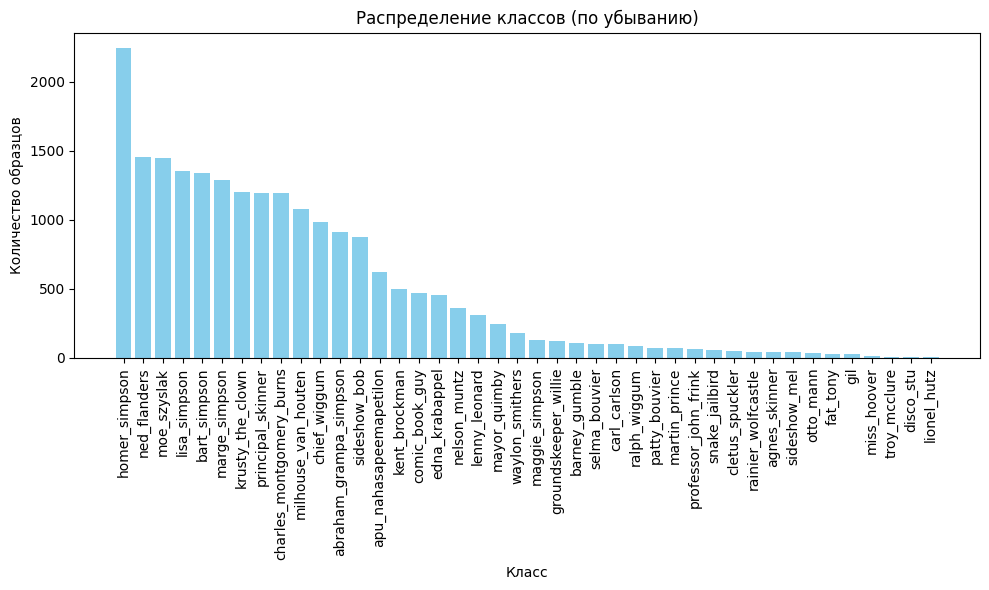

In [ ]:
train_val_labels = [path.parent.name for path in train_val_files]
# 1. –°—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–∫–∑–µ–º–ø–ª—è—Ä–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞
class_counts = Counter(train_val_labels)

# 2. –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –≤ —É–±—ã–≤–∞—é—â–µ–º –ø–æ—Ä—è–¥–∫–µ
sorted_class_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)

# –†–∞–∑–¥–µ–ª—è–µ–º –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ –∫–ª–∞—Å—Å—ã –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
classes, counts = zip(*sorted_class_counts)

# 3. –°—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('–ö–ª–∞—Å—Å')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ (–ø–æ —É–±—ã–≤–∞–Ω–∏—é)')
plt.xticks(rotation=90)  # –ü–æ–≤–æ—Ä–∞—á–∏–≤–∞–µ–º –ø–æ–¥–ø–∏—Å–∏ –æ—Å–∏ X –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —á—Ç–µ–Ω–∏—è
plt.tight_layout()
plt.show()

In [ ]:
df = pd.DataFrame(sorted_class_counts, columns=['–ö–ª–∞—Å—Å', '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ'])
df

–ö–ª–∞—Å—Å  –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ
0              homer_simpson        2246
1               ned_flanders        1454
2                moe_szyslak        1452
3               lisa_simpson        1354
4               bart_simpson        1342
5              marge_simpson        1291
6           krusty_the_clown        1206
7          principal_skinner        1194
8   charles_montgomery_burns        1193
9        milhouse_van_houten        1079
10              chief_wiggum         986
11    abraham_grampa_simpson         913
12              sideshow_bob         877
13    apu_nahasapeemapetilon         623
14             kent_brockman         498
15            comic_book_guy         469
16            edna_krabappel         457
17              nelson_muntz         358
18             lenny_leonard         310
19              mayor_quimby         246
20           waylon_smithers         181
21            maggie_simpson         128
22      groundskeeper_willie         121
23             barney_gumble         106
24             selma_bouvier         103
25              carl_carlson          98
26              ralph_wiggum          89
27             patty_bouvier          72
28             martin_prince          71
29      professor_john_frink          65
30            snake_jailbird          55
31           cletus_spuckler          47
32        rainier_wolfcastle          45
33             agnes_skinner          42
34              sideshow_mel          40
35                 otto_mann          32
36                  fat_tony          27
37                       gil          27
38               miss_hoover          17
39              troy_mcclure           8
40                 disco_stu           8
41               lionel_hutz           3

In [ ]:
low_data_classes = [cls for cls, count in class_counts.items() if count < 100]
low_data_classes

['miss_hoover',
 'martin_prince',
 'fat_tony',
 'professor_john_frink',
 'rainier_wolfcastle',
 'otto_mann',
 'agnes_skinner',
 'snake_jailbird',
 'troy_mcclure',
 'patty_bouvier',
 'gil',
 'ralph_wiggum',
 'disco_stu',
 'cletus_spuckler',
 'carl_carlson',
 'lionel_hutz',
 'sideshow_mel']

In [ ]:
data_classes = [cls for cls, count in class_counts.items()]
data_classes

['ned_flanders',
 'nelson_muntz',
 'miss_hoover',
 'bart_simpson',
 'chief_wiggum',
 'principal_skinner',
 'krusty_the_clown',
 'martin_prince',
 'groundskeeper_willie',
 'mayor_quimby',
 'selma_bouvier',
 'sideshow_bob',
 'lisa_simpson',
 'milhouse_van_houten',
 'charles_montgomery_burns',
 'fat_tony',
 'barney_gumble',
 'professor_john_frink',
 'marge_simpson',
 'rainier_wolfcastle',
 'otto_mann',
 'agnes_skinner',
 'kent_brockman',
 'snake_jailbird',
 'maggie_simpson',
 'troy_mcclure',
 'patty_bouvier',
 'edna_krabappel',
 'gil',
 'ralph_wiggum',
 'abraham_grampa_simpson',
 'lenny_leonard',
 'disco_stu',
 'cletus_spuckler',
 'comic_book_guy',
 'carl_carlson',
 'homer_simpson',
 'apu_nahasapeemapetilon',
 'lionel_hutz',
 'moe_szyslak',
 'sideshow_mel',
 'waylon_smithers']

# –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π

In [ ]:
augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), ratio=(0.75, 1.33))
])

In [ ]:
def augment_and_save(image_path, output_folder, num_aug):
    image = Image.open(image_path).convert("RGB")
    image = image.resize((224, 224))  # –ø—Ä–∏–≤–æ–¥–∏–º –∫ –æ–¥–Ω–æ–º—É —Ä–∞–∑–º–µ—Ä—É
    tensor_image = transforms.ToTensor()(image)

    for i in range(num_aug):
        augmented = augmentation(tensor_image)
        aug_image = transforms.ToPILImage()(augmented)

        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –Ω–æ–≤–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        filename = f"{image_path.stem}_aug_{i}{image_path.suffix}"
        aug_image.save(output_folder / filename)

In [ ]:
def augment_class_images(class_name, train_dir, augment_and_save_func, num_aug=10):
    """
    –ü—Ä–∏–º–µ–Ω—è–µ—Ç –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º –∑–∞–¥–∞–Ω–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ –∏ –¥–æ–±–∞–≤–ª—è–µ—Ç –∏—Ö –æ–±—Ä–∞—Ç–Ω–æ –≤ –¥–∞—Ç–∞—Å–µ—Ç.

    :param class_name: –∏–º—è –ø–∞–ø–∫–∏ —Å –∫–ª–∞—Å—Å–æ–º (–Ω–∞–ø—Ä–∏–º–µ—Ä 'lionel_hutz')
    :param train_dir: –ø—É—Ç—å –∫ –æ–±—É—á–∞—é—â–µ–π –ø–∞–ø–∫–µ —Å –¥–∞—Ç–∞—Å–µ—Ç–æ–º
    :param augment_and_save_func: —Ñ—É–Ω–∫—Ü–∏—è, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–∏–º–µ–Ω—è–µ—Ç –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –∏ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    :param num_aug: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∞—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –≤–µ—Ä—Å–∏–π –Ω–∞ –æ–¥–Ω–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
    """
    train_dir = Path(train_dir)
    output_dir = train_dir / f'{class_name}_augmented'
    output_dir.mkdir(exist_ok=True)

    # –ù–∞—Ö–æ–¥–∏–º –≤—Å–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –Ω—É–∂–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞
    class_dir = train_dir / class_name
    if not class_dir.exists():
        raise ValueError(f"–ü–∞–ø–∫–∞ {class_dir} –Ω–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ –∏–º—è –∫–ª–∞—Å—Å–∞.")

    image_files = list(class_dir.glob('*.jpg'))

    if not image_files:
        print(f"–ù–µ—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –∫–ª–∞—Å—Å–µ {class_name}")
        return

    # –ü—Ä–∏–º–µ–Ω—è–µ–º –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—é –∫ –∫–∞–∂–¥–æ–º—É —Ñ–∞–π–ª—É
    for file in image_files:
        augment_and_save_func(file, output_dir, num_aug)

    print(f"‚úÖ –ê—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤: {output_dir}")

    # –ö–æ–ø–∏—Ä—É–µ–º –Ω–æ–≤—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –æ–±—Ä–∞—Ç–Ω–æ –≤ –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—É—é –ø–∞–ø–∫—É
    for src_file in output_dir.glob("*.jpg"):
        dest_file = class_dir / src_file.name
        if not dest_file.exists():
            shutil.copy(src_file, dest_file)
        else:
            print(f"–§–∞–π–ª {src_file.name} —É–∂–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç. –ü—Ä–æ–ø—É—Å–∫.")

    # –£–¥–∞–ª—è–µ–º –≤—Ä–µ–º–µ–Ω–Ω—É—é –ø–∞–ø–∫—É
    if output_dir.exists():
        shutil.rmtree(output_dir)
        print(f"üóëÔ∏è –ü–∞–ø–∫–∞ {output_dir} —É–¥–∞–ª–µ–Ω–∞.")
    else:
        print(f"‚ùå –ü–∞–ø–∫–∞ {output_dir} –Ω–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç.")

In [ ]:
for cls in low_data_classes:
    augment_class_images(
        class_name=cls,
        train_dir='train/simpsons_dataset',
        augment_and_save_func=augment_and_save,
        num_aug=10
    )

‚úÖ –ê—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤: train/simpsons_dataset/miss_hoover_augmented
üóëÔ∏è –ü–∞–ø–∫–∞ train/simpsons_dataset/miss_hoover_augmented —É–¥–∞–ª–µ–Ω–∞.
‚úÖ –ê—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤: train/simpsons_dataset/martin_prince_augmented
üóëÔ∏è –ü–∞–ø–∫–∞ train/simpsons_dataset/martin_prince_augmented —É–¥–∞–ª–µ–Ω–∞.
‚úÖ –ê—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤: train/simpsons_dataset/fat_tony_augmented
üóëÔ∏è –ü–∞–ø–∫–∞ train/simpsons_dataset/fat_tony_augmented —É–¥–∞–ª–µ–Ω–∞.
‚úÖ –ê—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤: train/simpsons_dataset/professor_john_frink_augmented
üóëÔ∏è –ü–∞–ø–∫–∞ train/simpsons_dataset/professor_john_frink_augmented —É–¥–∞–ª–µ–Ω–∞.
‚úÖ –ê—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤: train/simpsons_dataset/rainier_wolfcastle_augmented
üóëÔ∏è –ü–∞–ø–∫–

In [ ]:
train_val_files = list(train_dir.rglob('*.jpg'))
len(train_val_files)


28393

`Path` –∏ —Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –∏–∑ –º–æ–¥—É–ª—è `pathlib` –¥–ª—è —É–¥–æ–±–Ω–æ–π —Ä–∞–±–æ—Ç—ã —Å –ø—É—Ç—è–º–∏ –∫ —Ñ–∞–π–ª–∞–º. –≠—Ç–æ –¥–µ–ª–∞–µ—Ç –∫–æ–¥ –∫—Ä–æ—Å—Å–ø–ª–∞—Ç—Ñ–æ—Ä–º–µ–Ω–Ω—ã–º.
`rglob('*.jpg')` —Ä–µ–∫—É—Ä—Å–∏–≤–Ω–æ –Ω–∞—Ö–æ–¥–∏—Ç –≤—Å–µ —Ñ–∞–π–ª—ã —Å —Ä–∞—Å—à–∏—Ä–µ–Ω–∏–µ–º `.jpg` –≤ —É–∫–∞–∑–∞–Ω–Ω—ã—Ö –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—è—Ö.

–î–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏ –Ω—É–∂–Ω–æ —Ä–∞–∑–¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫–∏:

In [ ]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

–ò–∑–≤–ª–µ–∫–∞–µ–º –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤ (–∏–º–µ–Ω–∞ –ø–µ—Ä—Å–æ–Ω–∞–∂–µ–π) –∏–∑ –Ω–∞–∑–≤–∞–Ω–∏–π —Ä–æ–¥–∏—Ç–µ–ª—å—Å–∫–∏—Ö –ø–∞–ø–æ–∫.
–ê train_test_split –¥–µ–ª–∏—Ç –¥–∞–Ω–Ω—ã–µ –Ω–∞ –¥–≤–µ —á–∞—Å—Ç–∏:
- train_files (75%) ‚Äî –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.
- val_files (25%) ‚Äî –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏.
- `stratify=train_val_labels` –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç, —á—Ç–æ –ø—Ä–æ–ø–æ—Ä—Ü–∏–∏ –∫–ª–∞—Å—Å–æ–≤ —Å–æ—Ö—Ä–∞–Ω—è—é—Ç—Å—è –≤ –æ–±–µ–∏—Ö –≤—ã–±–æ—Ä–∫–∞—Ö (–≤–∞–∂–Ω–æ, –µ—Å–ª–∏ –∫–ª–∞—Å—Å—ã –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã).

–î–∞—Ç–∞–ª–æ–∞–¥–µ—Ä –∑–∞ –≤–∞—Å —É–∂–µ –Ω–∞–ø–∏—Å–∞–Ω—ã :)

–î–ª—è —Ä–∞–±–æ—Ç—ã —Å –¥–∞–Ω–Ω—ã–º–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –∫–ª–∞—Å—Å `SimpsonsDataset`. –û–Ω –Ω–∞—Å–ª–µ–¥—É–µ—Ç—Å—è –æ—Ç `torch.utils.data.Dataset` –∏ –æ—Ç–≤–µ—á–∞–µ—Ç –∑–∞ –∑–∞–≥—Ä—É–∑–∫—É, –æ–±—Ä–∞–±–æ—Ç–∫—É –∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.

–ü—Ä–∏–Ω–∏–º–∞–µ—Ç —Å–ø–∏—Å–æ–∫ —Ñ–∞–π–ª–æ–≤ –∏ —Ä–µ–∂–∏–º (train, val, test):
- –í —Ä–µ–∂–∏–º–∞—Ö train –∏ val —Å–æ–∑–¥–∞–µ—Ç—Å—è LabelEncoder –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∏–º–µ–Ω –∫–ª–∞—Å—Å–æ–≤ –≤ —á–∏—Å–ª–æ–≤—ã–µ –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã.
- –í —Ä–µ–∂–∏–º–µ test –º–µ—Ç–∫–∏ –Ω–µ –Ω—É–∂–Ω—ã, —Ç–∞–∫ –∫–∞–∫ –∏—Ö –Ω–µ—Ç –≤ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
- –ú–µ—Ç–æ–¥ `__getitem__` p–∞–≥—Ä—É–∂–∞–µ—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ (load_sample), –ø—Ä–∏–≤–æ–¥–∏—Ç –µ–≥–æ –∫ —Ä–∞–∑–º–µ—Ä—É 224x224 (`_prepare_sample`), –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –≤ —Ç–µ–Ω–∑–æ—Ä –∏ –Ω–æ—Ä–º–∞–ª–∏–∑—É–µ—Ç —Å –ø–æ–º–æ—â—å—é `transforms.Compose` –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ç–µ–Ω–∑–æ—Ä –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ (–¥–ª—è train/val) –º–µ—Ç–∫—É –∫–ª–∞—Å—Å–∞.

In [ ]:
# —Ä–∞–∑–Ω—ã–µ —Ä–µ–∂–∏–º—ã –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞
data_modes = ['train', 'val', 'test']

class SimpsonsDataset(Dataset):
    """
    –î–∞—Ç–∞—Å–µ—Ç —Å –∫–∞—Ä—Ç–∏–Ω–∫–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–π –ø–∞—Ä–∞–ª–µ–ª—å–Ω–æ –ø–æ–¥–≥—Ä—É–∂–∞–µ—Ç –∏—Ö –∏–∑ –ø–∞–ø–æ–∫
    –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ —Ç–µ–Ω–∑–æ—Ä—ã
    """
    def __init__(self, files, mode):
        super().__init__()
        # —Å–ø–∏—Å–æ–∫ —Ñ–∞–π–ª–æ–≤ –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏
        self.files = sorted(files)
        # —Ä–µ–∂–∏–º —Ä–∞–±–æ—Ç—ã
        self.mode = mode

        self.len_ = len(self.files)

        # –°–æ–∑–¥–∞–µ–º —ç–Ω–∫–æ–¥–µ—Ä –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –º–µ—Ç–æ–∫ –≤ —á–∏—Å–ª–æ–≤—ã–µ
        self.label_encoder = LabelEncoder()

        # –î–ª—è —Ä–µ–∂–∏–º–æ–≤ train –∏ val –ø–æ–ª—É—á–∞–µ–º –º–µ—Ç–∫–∏ –∏–∑ –∏–º–µ–Ω –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–π
        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)


    def __len__(self):
        return self.len_

    def load_sample(self, file):
        """–ó–∞–≥—Ä—É–∑–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏–∑ —Ñ–∞–π–ª–∞"""
        image = Image.open(file)
        image.load()
        return image

    def __getitem__(self, index):
        """
        –ü–æ–ª—É—á–µ–Ω–∏–µ –æ–¥–Ω–æ–≥–æ —ç–ª–µ–º–µ–Ω—Ç–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø–æ –∏–Ω–¥–µ–∫—Å—É.
        –î–ª—è —Ä–µ–∂–∏–º–∞ test –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ç–æ–ª—å–∫–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ,
        –¥–ª—è train –∏ val –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –ø–∞—Ä—É (–∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ, –º–µ—Ç–∫–∞)
        """
        # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –¥–ª—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
        # –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –æ—Å–Ω–æ–≤–∞–Ω—ã –Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–µ ImageNet
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
       # –ó–∞–≥—Ä—É–∂–∞–µ–º –∏ –ø–æ–¥–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)

        # –î–ª—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ —Ä–µ–∂–∏–º–∞ –≤–æ–∑–≤—Ä–∞—â–∞–µ–º —Ç–æ–ª—å–∫–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        if self.mode == 'test':
            return x
        else:
            # –î–ª—è train –∏ val —Ä–µ–∂–∏–º–æ–≤ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –≤–æ–∑–≤—Ä–∞—â–∞–µ–º –º–µ—Ç–∫—É –∫–ª–∞—Å—Å–∞
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y

    def _prepare_sample(self, image):
        """–ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∫ –µ–¥–∏–Ω–æ–º—É —Ä–∞–∑–º–µ—Ä—É 224x224"""
        image = image.resize((224, 224))
        return np.array(image)

In [ ]:
train_dataset = SimpsonsDataset(train_files, mode='train')
val_dataset = SimpsonsDataset(val_files, mode='val')
test_dataset = SimpsonsDataset(test_files, mode='test')

–¢–µ–ø–µ—Ä—å –æ–ø—Ä–µ–¥–µ–ª–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –∫–∞—Ä—Ç–∏–Ω–æ–∫ –∏ –≤—ã–≤–µ–¥–µ–º 9 —Å–ª—É—á–∞–π–Ω—ã—Ö –∏–∑ —Ç—Ä–µ–π–Ω–∞.

–§—É–Ω–∫—Ü–∏—è –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç —Ç–µ–Ω–∑–æ—Ä –æ–±—Ä–∞—Ç–Ω–æ –≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ, `transpose((1, 2, 0))` –º–µ–Ω—è–µ—Ç –ø–æ—Ä—è–¥–æ–∫ –æ—Å–µ–π —Å (C, H, W) –Ω–∞ (H, W, C) –∏ –¥–µ–ª–∞–µ—Ç –æ–±—Ä–∞—Ç–Ω—É—é –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é: –¥–æ–±–∞–≤–ª—è–µ—Ç —Å—Ä–µ–¥–Ω–µ–µ –∏ —É–º–Ω–æ–∂–∞–µ—Ç –Ω–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ.

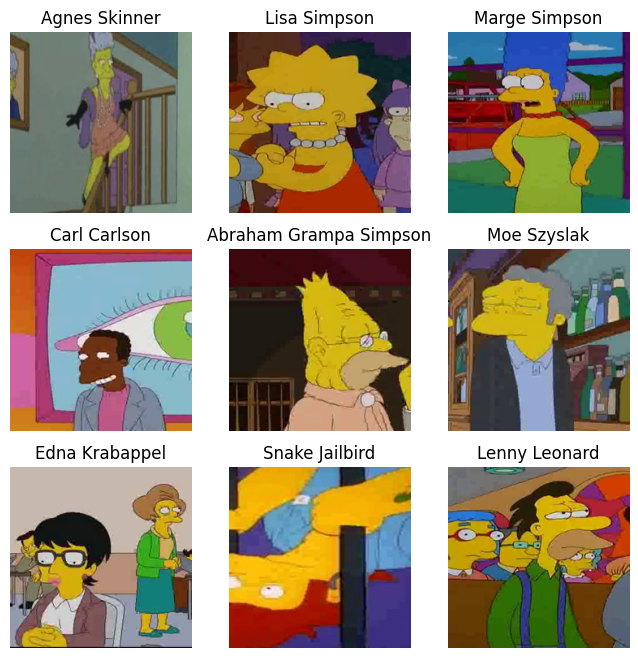

In [ ]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """
    –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è —Ç–µ–Ω–∑–æ—Ä–æ–≤ –∫–∞–∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.
    –ü—Ä–æ–∏–∑–≤–æ–¥–∏—Ç –æ–±—Ä–∞—Ç–Ω—É—é –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é –¥–ª—è –ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è.
    """
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)  # –î–æ–±–∞–≤–∏–º –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.axis('off')  # –û—Ç–∫–ª—é—á–∞–µ–º –æ—Å–∏

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 8), sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0, len(train_dataset)))
    im_val, label = train_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(), train_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), title=img_label, plt_ax=fig_x)
plt.show()

–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –≤—Å–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –∑–Ω–∞–Ω–∏—è (–º–æ–∂–Ω–æ –∏ –≤—ã–π—Ç–∏ –∑–∞ —Ä–∞–º–∫–∏ –ø—Ä–æ–π–¥–µ–Ω–Ω–æ–≥–æ –º–∞—Ç–µ—Ä–∏–∞–ª–∞), —á—Ç–æ–±—ã –¥–æ–±–∏—Ç—å—Å—è –Ω–∞–∏–ª—É—á—à–µ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö (accuracy).
–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —Ç—Ä–µ–±—É–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫–∏ - 0.83. –ü–æ—Å—Ç–∞—Ä–∞–π—Ç–µ—Å—å –ø–æ–ª—É—á–∏—Ç—å 0.95+ ;)  
–ù–∞ —Ç–µ—Å—Ç–µ —Å–¥–µ–ª–∞–π—Ç–µ –≤–∏–∑—É–∞–ª—å–Ω—É—é –ø—Ä–æ–≤–µ—Ä–∫—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.

–ö—Ä–æ–º–µ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ –∏ –æ—Ü–µ–Ω–∫–∏ –µ—ë –∫–∞—á–µ—Å—Ç–≤–∞ –≤–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ:
- –∑–∞–º–µ—Ä—è—Ç—å –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è —Å–µ—Ç–∏;
- –Ω–∞–ø–∏—Å–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –Ω–∞ –≤—Ö–æ–¥ –±—É–¥–µ—Ç –ø—Ä–∏–Ω–∏–º–∞—Ç—å —Å—Å—ã–ª–∫—É –Ω–∞ –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å –µ–≥–æ –∫–ª–∞—Å—Å;
- –Ω–∞–ø–∏—Å–∞—Ç—å –∫–æ–¥, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –≤—ã–≤–æ–¥—Ç—å —Å–ª—É—á–∞–π–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏–∑ —Ç–µ—Å—Ç–∞ —Å –ø—Ä–æ–≥–Ω–æ–∑–∞–º–∏ –¥–ª—è –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏–∏ —Ç–æ–≥–æ, –≥–¥–µ –º–æ–¥–µ–ª—å –æ—à–∏–±–∞–µ—Ç—Å—è.

–ò–∑—É—á–∏—Ç–µ –∫–ª–∞—Å—Å—ã, –Ω–∞ –∫–æ—Ç–æ—Ä—ã—Ö –º–æ–¥–µ–ª—å —á–∞—â–µ –≤—Å–µ–≥–æ –æ—à–∏–±–∞–µ—Ç—Å—è, –Ω–∞–ø–∏—à–∏—Ç–µ —Ñ–∏–Ω–∞–ª—å–Ω—ã–µ –≤—ã–≤–æ–¥—ã –∏ –ø—É—Ç–∏ –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ —É–ª—É—á—à–µ–Ω–∏—è —Ä–∞–±–æ—Ç—ã.

**–†–µ–∫–æ–º–µ–Ω–¥—É–µ–º—ã–π –ø–ª–∞–Ω —Ä–∞–±–æ—Ç—ã**

–ò–∑—É—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã:
1. –ò–∑—É—á–∏—Ç–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤.
2. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.
3. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ —Å–ª–æ–∂–Ω—ã–µ –∫–ª–∞—Å—Å—ã –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –º–æ–¥–µ–ª—å—é.

–ë–∞–∑–æ–≤–æ–µ —Ä–µ—à–µ–Ω–∏–µ:
1.   –û–±—É—á–∏—Ç—å –ø—Ä–æ—Å—Ç—É—é –º–æ–¥–µ–ª—å, –∏—Å–ø–æ–ª—å–∑—É—è –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—É—é –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É. –ü—Ä–∏ –∂–µ–ª–∞–Ω–∏–∏ –ø–æ–ø—Ä–æ–±—É–π—Ç–µ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Å–≤–æ—é –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É —Å –Ω—É–ª—è, —ç—Ç–æ –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ, –Ω–æ –±—É–¥–µ—Ç –ø–ª—é—Å–æ–º.
2.   –û—Ü–µ–Ω–∏—Ç–µ –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è, –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫.
3. –í—ã–≤–µ–¥–∏—Ç–µ –ø—Ä–æ–≥–Ω–æ–∑—ã –¥–ª—è –Ω–∞–±–æ—Ä–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏, –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ, –Ω–∞ –∫–∞–∫–∏—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è—Ö –º–æ–¥–µ–ª—å –æ—à–∏–±–∞–µ—Ç—Å—è —á–∞—â–µ –≤—Å–µ–≥–æ. –í—ã–¥–≤–∏–Ω–∏—Ç–µ –≥–∏–ø–æ—Ç–µ–∑—ã –æ –ø—Ä–∏—á–∏–Ω–∞—Ö.
4. –ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, –ø—Ä–∏–Ω–∏–º–∞—é—â—É—é URL –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –ø—Ä–æ–∏–∑–≤–æ–¥—è—â—É—é –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è (–∑–∞–≥—Ä—É–∑–∫–∞, –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞, –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è) –∏ –≤–æ–∑–≤—Ä–∞—â–∞—é—â—É—é –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å.

–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è:
1. –î–æ–±–∞–≤—å—Ç–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—é –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ–±—ã –ø–æ–≤—ã—Å–∏—Ç—å —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –º–æ–¥–µ–ª–∏, —É–º–µ–Ω—å—à–∏—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ, —É–ª—É—á—à–∏—Ç—å –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤.
2. –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ —Å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –º–æ–¥–µ–ª–µ–π (learning rate, batch size, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö, –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä).
3. –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ —Å transfer learning. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ —Ä–∞–∑–Ω—ã–µ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏, –∑–∞–º–æ—Ä–∞–∂–∏–≤–∞—è —Ä–∞–∑–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–µ–≤.

–ü—Ä–µ–¥–ª–æ–∂–∏—Ç–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è.


–ß—Ç–æ–±—ã –Ω–µ –æ–≥—Ä–∞–Ω—á–∏–≤–∞—Ç—å—Å—è –º–æ—â–Ω–æ—Å—Ç—è–º–∏ Colab, –º–æ–∂–µ—Ç–µ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å [–∑–∞–¥–µ–π—Å—Ç–≤–æ–≤–∞—Ç—å –º–æ—â–Ω–æ—Å—Ç–∏](https://www.kaggle.com/docs/notebooks#kaggle-jupyter-server) Kaggle. –û–Ω–∏ –¥–∞—é—Ç CPU –±–µ–∑ –ª–∏–º–∏—Ç–∞, 30—á GPU / 20—á TPU –≤ –Ω–µ–¥–µ–ª—é + 330 –ì–ë RAM).

–†–∞–±–æ—Ç–∞–µ—Ç –ø—Ä–æ—Å—Ç–æ:
1Ô∏è‚É£ –û—Ç–∫—Ä—ã–≤–∞–µ—Ç–µ –Ω–æ—É—Ç–±—É–∫ –Ω–∞ Kaggle ‚Üí –∂–º—ë—Ç–µ Run > Kaggle Jupyter Server.
2Ô∏è‚É£ –í—ã–±–∏—Ä–∞–µ—Ç–µ —Ä–µ–¥–∞–∫—Ç–æ—Ä: Colab –∏–ª–∏ VS Code (—á–µ—Ä–µ–∑ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–π URL).

In [ ]:
n_classes = np.unique(train_val_labels)
n_classes

array(['abraham_grampa_simpson', 'agnes_skinner',
       'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson',
       'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum',
       'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel',
       'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson',
       'kent_brockman', 'krusty_the_clown', 'lenny_leonard',
       'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson',
       'martin_prince', 'mayor_quimby', 'milhouse_van_houten',
       'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz',
       'otto_mann', 'patty_bouvier', 'principal_skinner',
       'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum',
       'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird',
       'troy_mcclure', 'waylon_smithers'], dtype='<U24')

In [ ]:
print(f"–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ {len(train_files)} –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π–π")
print(f"–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ {len(val_files)} –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π")
print(f"–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ {len(test_files)} –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π")

–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ 21294 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π–π
–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ 7099 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ 991 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π


In [ ]:
def train(model, train_loader, val_loader, loss_fn, optimizer, epochs):
    model.to(device)

    model.train()

    start_time = time.time()  # –ó–∞–ø–æ–º–∏–Ω–∞–µ–º –Ω–∞—á–∞–ª–æ –æ–±—É—á–µ–Ω–∏—è

    for epoch in range(epochs):
        # –∏—Ç–µ—Ä–∏—Ä—É–µ–º –ø–æ –±–∞—Ç—á–∞–º –Ω–∞ —Ç—Ä–µ–π–Ω–µ
        for X_batch, y_batch in train_loader:
            # –ø–µ—Ä–µ–≤–æ–¥–∏–º –±–∞—Ç—á–∏ –Ω–∞ GPU
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            # –ø–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ –¥–ª—è –±–∞—Ç—á–∞
            y_pred = model(X_batch)
            # –≤—ã—á–∏—Å–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å –¥–ª—è –±–∞—Ç—á–∞
            loss = loss_fn(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # –≤—ã–∑—ã–≤–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é evaluate –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ –ø–æ–ª—É—á–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –∏ —Ç–æ—á–Ω–æ—Å—Ç–∏
        print(f'–≠–ø–æ—Ö–∞ {epoch+1}')
        val_loss, val_accuracy = evaluate(model, val_loader, loss_fn)

    end_time = time.time()  # –ó–∞–ø–æ–º–∏–Ω–∞–µ–º –∫–æ–Ω–µ—Ü –æ–±—É—á–µ–Ω–∏—è
    total_time = end_time - start_time
    print(f"\n–û–±—â–µ–µ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: {total_time:.2f} —Å–µ–∫—É–Ω–¥")

    return model, total_time

def evaluate(model, data_loader, loss_fn):
    total_loss = 0
    correct = 0
    model.to(device)
    # –ø–µ—Ä–µ–≤–æ–¥–∏–º –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º –æ—Ü–µ–Ω–∫–∏
    model.eval()
    # –≤–∫–ª—é—á–∞–µ–º –∫–æ–Ω—Ç–µ–∫—Å—Ç–Ω—ã–π –º–µ–Ω–µ–¥–∂–µ—Ä –¥–ª—è –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞
    with torch.inference_mode():
        # –∏—Ç–µ—Ä–∏—Ä—É–µ–º –ø–æ –±–∞—Ç—á–∞–º
        for X, y in data_loader:
            # –ø–µ—Ä–µ–≤–æ–¥–∏–º –±–∞—Ç—á–∏ –Ω–∞ GPU
            X, y = X.to(device), y.to(device)
            # –¥–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏
            pred = model(X)
            # –≤—ã—á–∏—Å–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å
            loss = loss_fn(pred, y)
            # –¥–æ–±–∞–≤–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å –∫ —Å—É–º–º–∞—Ä–Ω–æ–π
            total_loss += loss.item()
            # –ø–æ–ª—É—á–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è—Ö –º–æ–¥–µ–ª–∏
            pred = torch.argmax(pred, dim=1)
            # —Å—Ä–∞–≤–Ω–∏–≤–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ —Å –º–µ—Ç–∫–∞–º–∏ –∏ —Å—á–∏—Ç–∞–µ–º, —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –æ–Ω–∏ —Å–æ–≤–ø–∞–¥–∞—é—Ç
            correct += torch.sum(pred == y).item()

    # –≤—ã—á–∏—Å–ª—è–µ–º —Å—Ä–µ–¥–Ω—é—é —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å –ø–æ –¥–∞–Ω–Ω—ã–º
    mean_loss = total_loss / len(data_loader)
    # –≤—ã—á–∏—Å–ª—è–µ–º —Ç–æ—á–Ω–æ—Å—Ç—å –ø–æ –¥–∞–Ω–Ω—ã–º
    accuracy = correct / len(data_loader.dataset)

    print(f"–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö {mean_loss}")
    print(f"–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö {accuracy}")

    return mean_loss, accuracy

In [ ]:
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=128)
val_loader = DataLoader(val_dataset, shuffle=False, batch_size=128)
loss_fn = torch.nn.CrossEntropyLoss()

# Resnet50

In [ ]:
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
model

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 97.8M/97.8M [00:00<00:00, 139MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
model.fc = nn.Linear(2048, 42)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

trained_model, trained_time = train(model, train_loader, val_loader, loss_fn, optimizer, epochs=10)

–≠–ø–æ—Ö–∞ 1
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.23515419206482224
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.9335201793721973
–≠–ø–æ—Ö–∞ 2
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 3.3900119611195154
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.12567264573991033
–≠–ø–æ—Ö–∞ 3
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 3.275439396926335
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.15762331838565022
–≠–ø–æ—Ö–∞ 4
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 2.6946591237826008
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.21614349775784752
–≠–ø–æ—Ö–∞ 5
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 2.254141907606806
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.35134529147982063
–≠–ø–æ—Ö–∞ 6
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 1.5122257445539746
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.5734304932735426
–≠–ø–æ—Ö–∞ 7
–§—É–Ω–∫—Ü–∏

In [ ]:
trained_model_mean_loss, trained_model_accuracy = evaluate(trained_model, val_loader, loss_fn)

In [ ]:
#–î–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
mod = pd.DataFrame(columns=["–ú–æ–¥–µ–ª—å —Å–µ—Ç–∏", "Accuracy –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏", '–í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è'])

# –î–æ–±–∞–≤–ª—è–µ–º —Å—Ç—Ä–æ–∫—É —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
mod.loc[len(mod)] = ["0_resnet50(weights=pretrained)", trained_model_accuracy, trained_time]

In [ ]:
mod

In [ ]:
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
# --- –°–æ–∑–¥–∞–µ–º –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—é –¥–ª—è –º–æ–¥–µ–ª–µ–π (–µ—Å–ª–∏ –µ–µ –Ω–µ—Ç) ---
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # –°–æ–∑–¥–∞—Ç—å —Ä–æ–¥–∏—Ç–µ–ª—å—Å–∫–∏–µ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏, –µ—Å–ª–∏ –Ω—É–∂–Ω–æ
                 exist_ok=True) # –ù–µ –≤—ã–∑—ã–≤–∞—Ç—å –æ—à–∏–±–∫—É, –µ—Å–ª–∏ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—è —É–∂–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç

# --- –û–ø—Ä–µ–¥–µ–ª—è–µ–º –∏–º—è —Ñ–∞–π–ª–∞ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è ---
MODEL_NAME = "0_pytorch_resnet50_wieghts.pth" # –ò—Å–ø–æ–ª—å–∑—É–µ–º —Ä–∞—Å—à–∏—Ä–µ–Ω–∏–µ .pth –∏–ª–∏ .pt
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"\n–°–æ—Ö—Ä–∞–Ω—è–µ–º state_dict –º–æ–¥–µ–ª–∏ –≤: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # –°–æ—Ö—Ä–∞–Ω—è–µ–º  state_dict
           f=MODEL_SAVE_PATH)
print("–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞.")

# resnet18

In [ ]:
model_1 = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 44.7M/44.7M [00:00<00:00, 171MB/s]


In [ ]:
def create_model(model, num_freeze_layers, num_out_classes):
    # –∑–∞–º–µ–Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ —Å–ª–æ—è —Å–µ—Ç–∏
    model.fc = nn.Linear(512, num_out_classes)

    # –∑–∞–º–æ—Ä–æ–∑–∫–∞ —Å–ª–æ–µ–≤
    for i, layer in enumerate(model.children()):
        if i <= num_freeze_layers:
            for param in layer.parameters():
                param.requires_grad = False

    return model

In [ ]:
model_1 = create_model(models.resnet18(weights=models.ResNet18_Weights.DEFAULT), 8, 42)
model_1

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
optimizer_1 = torch.optim.Adam(model_1.parameters(), lr=1e-3)
trained_model_1, trained_time_1 = train(model_1, train_loader, val_loader, loss_fn, optimizer_1, epochs=10)

–≠–ø–æ—Ö–∞ 1
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 1.4050092459789345
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.6928251121076233
–≠–ø–æ—Ö–∞ 2
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 1.0385974333754608
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.7619955156950673
–≠–ø–æ—Ö–∞ 3
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.8926418006420136
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.7883408071748879
–≠–ø–æ—Ö–∞ 4
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.8313141704137836
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.7955156950672646
–≠–ø–æ—Ö–∞ 5
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.7683989561029843
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.8047085201793722
–≠–ø–æ—Ö–∞ 6
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.72294876234872
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.8162556053811659
–≠–ø–æ—Ö–∞ 7
–§—É–Ω–∫—Ü–∏—è –ø

In [ ]:
trained_model_mean_loss_1, trained_model_accuracy_1 = evaluate(trained_model_1, val_loader, loss_fn)

–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.6487829933475171
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.83195067264574


In [ ]:
# –î–æ–±–∞–≤–ª—è–µ–º —Å—Ç—Ä–æ–∫—É —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
mod.loc[len(mod)] = ["1_resnet18(Weights.DEFAULT), frozen8", trained_model_accuracy_1, trained_time_1]
mod

–ú–æ–¥–µ–ª—å —Å–µ—Ç–∏  Accuracy –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏  –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è
0        0_resnet50(weights=pretrained)               0.113489      901.450039
1  1_resnet18(Weights.DEFAULT), frozen8               0.763661     1139.846214

In [ ]:
# --- –û–ø—Ä–µ–¥–µ–ª—è–µ–º –∏–º—è —Ñ–∞–π–ª–∞ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è ---
MODEL_NAME = "1_pytorch_resnet18_wieghts_frozen8.pth" # –ò—Å–ø–æ–ª—å–∑—É–µ–º —Ä–∞—Å—à–∏—Ä–µ–Ω–∏–µ .pth –∏–ª–∏ .pt
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"\n–°–æ—Ö—Ä–∞–Ω—è–µ–º state_dict –º–æ–¥–µ–ª–∏ –≤: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # –°–æ—Ö—Ä–∞–Ω—è–µ–º  state_dict
           f=MODEL_SAVE_PATH)
print("–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞.")


–°–æ—Ö—Ä–∞–Ω—è–µ–º state_dict –º–æ–¥–µ–ª–∏ –≤: models/1_pytorch_resnet18_wieghts_frozen8.pth
–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞.


# resnet18(–∑–∞–º–æ—Ä–æ–∑–∫–∞ 5 —Å–ª–æ–µ–≤)

In [ ]:
model_2 = create_model(models.resnet18(weights=models.ResNet18_Weights.DEFAULT), 5, 42)
model_2

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
optimizer_2 = torch.optim.Adam(model_2.parameters(), lr=1e-3)
trained_model_2, trained_time_2 = train(model_2, train_loader, val_loader, loss_fn, optimizer_2, epochs=10)

–≠–ø–æ—Ö–∞ 1
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.22261817161259906
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.9435131708691366
–≠–ø–æ—Ö–∞ 2
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 3.50206515618733
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.058458937878574445
–≠–ø–æ—Ö–∞ 3
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 3.0871569556849345
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.1246654458374419
–≠–ø–æ—Ö–∞ 4
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 2.894434560622488
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.17551767854627412
–≠–ø–æ—Ö–∞ 5
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 2.1525584597672736
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.3907592618678687
–≠–ø–æ—Ö–∞ 6
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 1.2794609091111593
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.6433300464854205
–≠–ø–æ—Ö–∞ 7
–§—É–Ω–∫—Ü–∏—è

In [ ]:
trained_model_mean_loss_2, trained_model_accuracy_2 = evaluate(trained_model_2, val_loader, loss_fn)

–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.4240741892551471
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.8860402873644175


In [ ]:
#–î–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
mod = pd.DataFrame(columns=["–ú–æ–¥–µ–ª—å —Å–µ—Ç–∏", "Accuracy –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏", '–í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è'])

# –î–æ–±–∞–≤–ª—è–µ–º —Å—Ç—Ä–æ–∫—É —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
mod.loc[len(mod)] = ["0_resnet18(weights=pretrained)+frozen5", trained_model_accuracy_2, trained_time_2]

In [ ]:
mod

–ú–æ–¥–µ–ª—å —Å–µ—Ç–∏  Accuracy –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏  \
0  0_resnet18(weights=pretrained)+frozen5                0.88604   

   –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è  
0      1377.19065

# alexnet

In [ ]:
model_3 = models.alexnet(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
#–¥—Ä—É–≥–æ–π —Å–ø–æ—Å–æ–± —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏, –æ—Ç–ª–∏—á–∞—é—â–∏–π—Å—è –æ—Ç –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –≤ resnet18
from itertools import chain

layers_to_unfreeze = 5

# –í—ã–∫–ª—é—á–∞–µ–º –ø–æ–¥—Å—á–µ—Ç –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤ –¥–ª—è —Å–ª–æ–µ–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –±—É–¥–µ–º –æ–±—É—á–∞—Ç—å
for param in model_3.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False

# num_features -- —ç—Ç–æ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –≤–µ–∫—Ç–æ—Ä–∞ —Ñ–∏—á, –ø–æ—Å—Ç—É–ø–∞—é—â–µ–≥–æ –Ω–∞ –≤—Ö–æ–¥ FC-—Å–ª–æ—é
num_features = 4096
# –ó–∞–º–µ–Ω—è–µ–º Fully-Connected —Å–ª–æ–π –Ω–∞ –Ω–∞—à –ª–∏–Ω–µ–π–Ω—ã–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä
model_3.classifier[6] = nn.Linear(num_features, 42)

# –û–±—É—á–∞–µ–º –ø–æ—Å–ª–µ–¥–Ω–∏–µ layers_to_unfreeze —Å–ª–æ–µ–≤ –∏–∑ —Å–≤–µ—Ä—Ç–æ—á–Ω–æ–π —á–∞—Å—Ç–∏ –∏ fully connected —Å–ª–æ–π
# parameters() –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –ø—Ä–æ—Å—Ç–æ —Å–ø–∏—Å–æ–∫ —Ç–µ–Ω–∑–æ—Ä–æ–≤ –ø–∞—Ä–∞–º—Ç–µ—Ä–æ–≤, –ø–æ—ç—Ç–æ–º—É –¥–≤–∞ —Ç–∞–∫–∏—Ö —Å–ø–∏—Å–∫–∞ –º–æ–∂–Ω–æ —Å–ª–æ–∂–∏—Ç—å
optimizer_3 = torch.optim.Adam(
    chain(
        list(model_3.features.parameters())[-layers_to_unfreeze:],
        model_3.classifier.parameters()
    ),
    lr=1e-3,
)

In [ ]:
trained_model_3, trained_time_3 = train(model_3, train_loader, val_loader, loss_fn, optimizer_3, epochs=10)

–≠–ø–æ—Ö–∞ 1
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.5307470882045371
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.8644879560501479
–≠–ø–æ—Ö–∞ 2
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.4082191150768527
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.8984363994928863
–≠–ø–æ—Ö–∞ 3
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.5551941404285442
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.8778701225524722
–≠–ø–æ—Ö–∞ 4
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.5148225109525291
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.8932243978025074
–≠–ø–æ—Ö–∞ 5
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.5535527119146926
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.9023806169883082
–≠–ø–æ—Ö–∞ 6
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.5280548911874315
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.9059022397520777
–≠–ø–æ—Ö–∞ 7
–§—É–Ω–∫—Ü–∏—è 

In [ ]:
trained_model_mean_loss_3, trained_model_accuracy_3 = evaluate(trained_model_3, val_loader, loss_fn)

–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è) –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.6856742139373507
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö 0.9064656993942809


In [ ]:
mod.loc[len(mod)] = ["3_alexnet(pretrained=True)+unfreeze5", trained_model_accuracy_3, trained_time_3]
mod

–ú–æ–¥–µ–ª—å —Å–µ—Ç–∏  Accuracy –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏  \
0  0_resnet18(weights=pretrained)+frozen5               0.886040   
1    3_alexnet(pretrained=True)+unfreeze5               0.906466   

   –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è  
0     1377.190650  
1     1268.944335

In [ ]:
MODEL_PATH = Path("models")
# --- –û–ø—Ä–µ–¥–µ–ª—è–µ–º –∏–º—è —Ñ–∞–π–ª–∞ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è ---
MODEL_NAME = "3_pytorch_alexnet_unfreeze5.pth" # –ò—Å–ø–æ–ª—å–∑—É–µ–º —Ä–∞—Å—à–∏—Ä–µ–Ω–∏–µ .pth –∏–ª–∏ .pt
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"\n–°–æ—Ö—Ä–∞–Ω—è–µ–º state_dict –º–æ–¥–µ–ª–∏ –≤: {MODEL_SAVE_PATH}")
torch.save(obj=model_3.state_dict(), # –°–æ—Ö—Ä–∞–Ω—è–µ–º  state_dict
           f=MODEL_SAVE_PATH)
print("–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞.")


–°–æ—Ö—Ä–∞–Ω—è–µ–º state_dict –º–æ–¥–µ–ª–∏ –≤: models/3_pytorch_alexnet_unfreeze5.pth


RuntimeError: Parent directory models does not exist.

In [ ]:
!pip install torchmetrics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 963.5/963.5 kB 24.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 125.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 90.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 50.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
from torchmetrics import ConfusionMatrix

In [ ]:
def get_all_preds(model, loader):
    model.eval()
    with torch.inference_mode():
        preds = []
        labels = []
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            preds.append(pred.cpu())
            labels.append(y.cpu())
        preds = torch.cat(preds, dim=0)
        labels = torch.cat(labels, dim=0)
        pred_classes = preds.argmax(dim=1)
        return labels, pred_classes

In [ ]:
def showmatrix(conf):
    df_conf = pd.DataFrame(conf,
                       index=[f"y_true={i}" for i in data_classes],
                       columns=[f"y_pred={i}" for i in data_classes])
    plt.figure(figsize=(16, 14))
    sns.heatmap(df_conf, annot=True, cmap='Blues', fmt='g')

In [ ]:
test_labels, test_preds = get_all_preds(trained_model_3, val_loader)

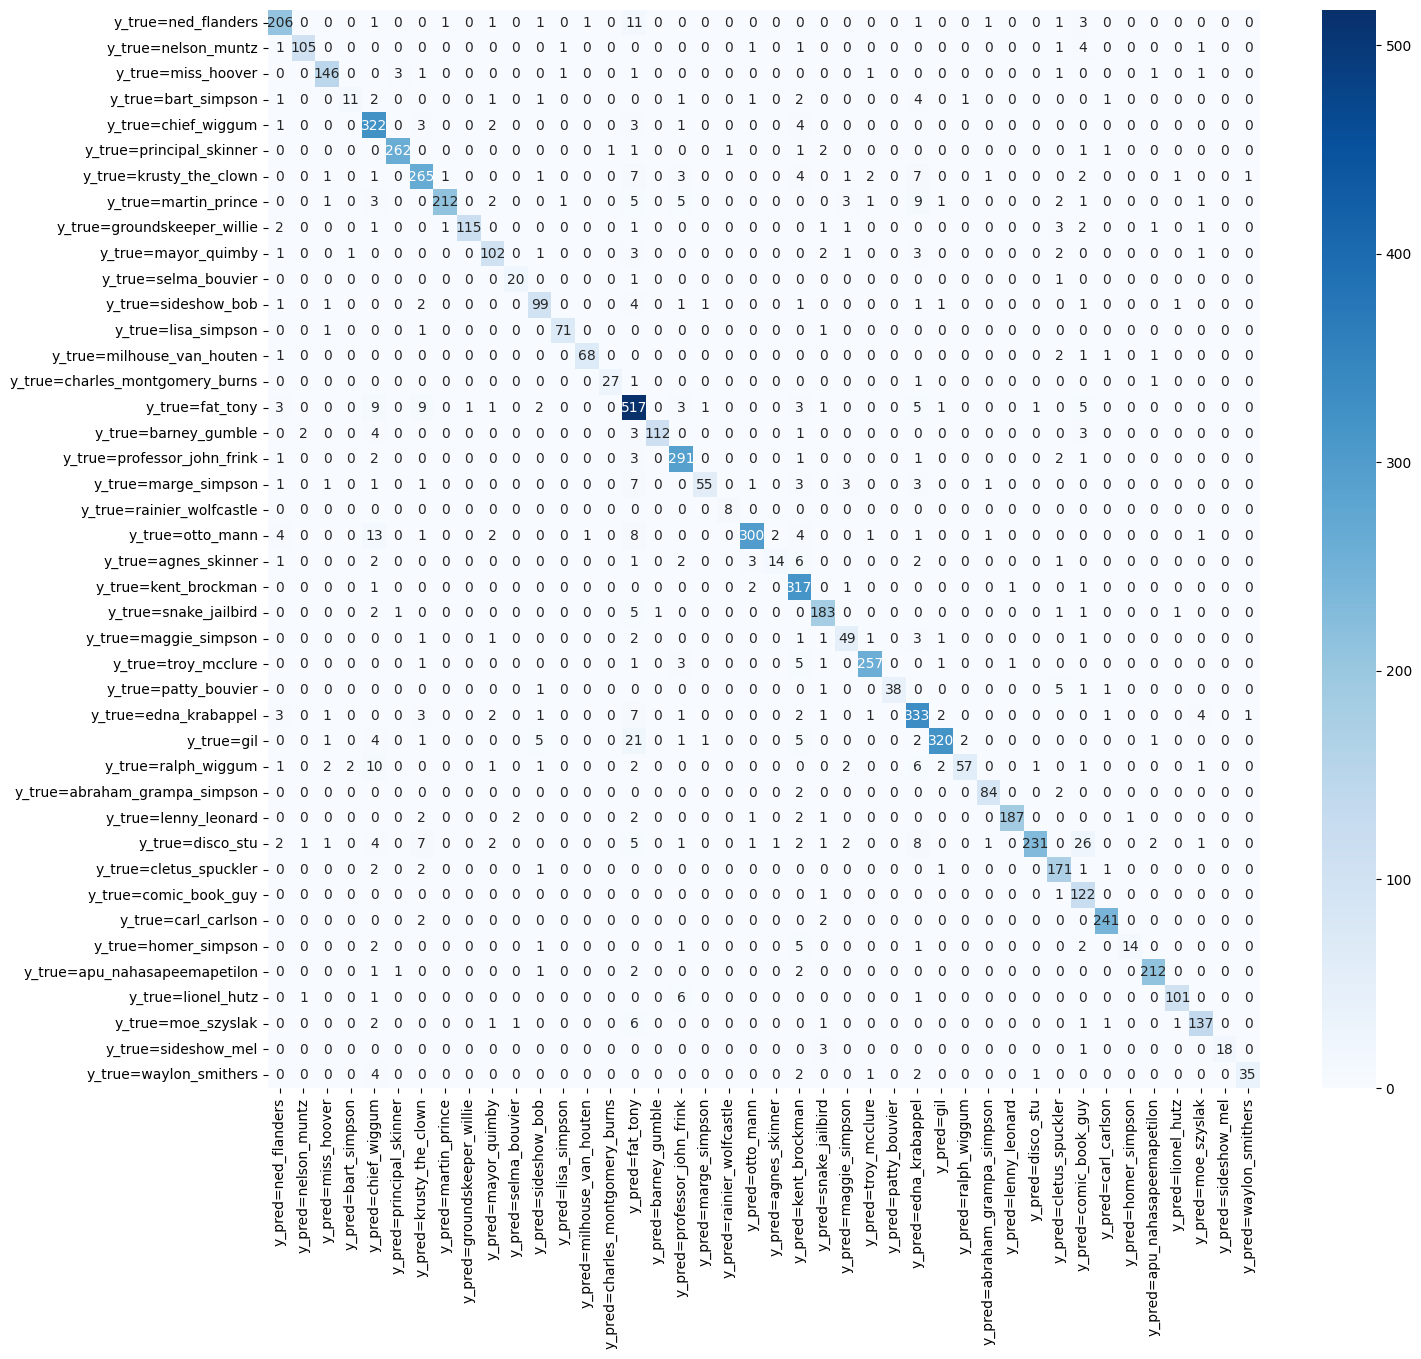

In [ ]:
confmat = ConfusionMatrix(task='multiclass', num_classes=42)
confusion_matrix = confmat(test_preds, test_labels)
showmatrix(confusion_matrix)

1. resnet50+–∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è - 0.8799 - 2919 —Å–µ–∫
2. resnet50+–±–µ–∑–∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏+–±–µ–∑ –≤–µ—Å–æ–≤ - 0.1134 - 901 —Å–µ–∫
3. resnet18+–∑–∞–º–æ—Ä–æ–∑–∫–∞ 8 —Å–ª–æ–µ–≤+–∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è - 0.8319 - 1548 —Å–µ–∫
4. resnet18+–∑–∞–º–æ—Ä–æ–∑–∫–∞ 5 —Å–ª–æ–µ–≤+–∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è - 0.8860 - 1377 —Å–µ–∫
5. resnet18+–∑–∞–º–æ—Ä–æ–∑–∫–∞ 8 —Å–ª–æ–µ–≤+–±–µ–∑–∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ - 0.7636 - 1139 —Å–µ–∫
6. alexnet+–∑–∞–º–æ—Ä–æ–∑–∫–∞ –≤—Å–µ—Ö –≤–µ—Å–æ–≤ +–±–µ–∑–∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ -  0.7678 - 1128 —Å–µ–∫
7.alexnet+—Ä–∞–∑–º–æ—Ä–æ–∑–∫–∞ 5 –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —Å–ª–æ–µ–≤ +–∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è -  0.9064 - 1269 —Å–µ–∫


# –ü—Ä–æ–≤–µ—Ä–∫–∞

In [ ]:
import requests
from io import BytesIO
from PIL import Image

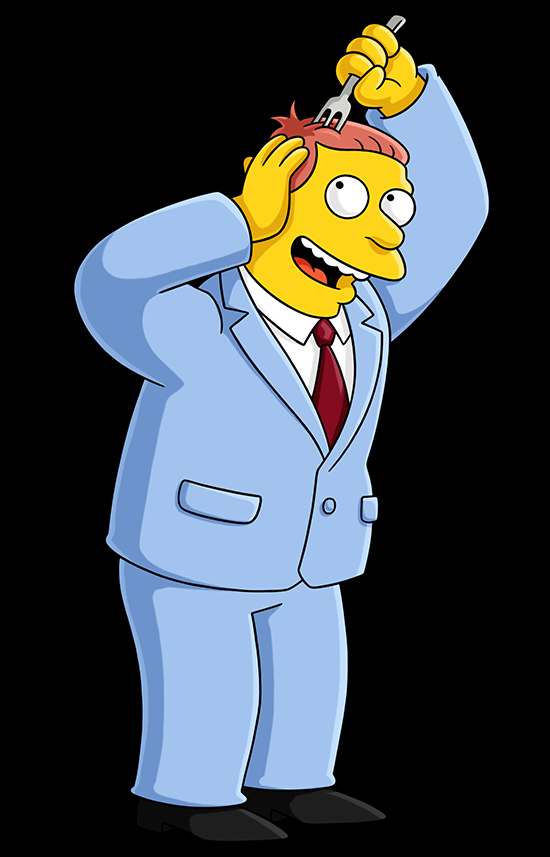

In [ ]:
url = 'https://static.wikia.nocookie.net/simpsons/images/e/ed/Lionel_Hutz.png/revision/latest?cb=20171127153913'
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert('RGB')
image

In [ ]:
pretrained_transforms = models.AlexNet_Weights.DEFAULT.transforms()

In [ ]:
transformed_img = pretrained_transforms(image)
# –î–æ–±–∞–≤–ª—è–µ–º batch dimension (–º–æ–¥–µ–ª–∏ –æ–∂–∏–¥–∞—é—Ç –≤—Ö–æ–¥ [batch_size, channels, H, W])
input_tensor = transformed_img.unsqueeze(0)

In [ ]:
# –ü–µ—Ä–µ–º–µ—â–∞–µ–º —Ç–µ–Ω–∑–æ—Ä –Ω–∞ GPU, –µ—Å–ª–∏ –º–æ–¥–µ–ª—å —Ç–∞–º
device = next(model_3.parameters()).device
input_tensor = input_tensor.to(device)

In [ ]:
# –®–∞–≥ 3: –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏
model_3.eval()
with torch.no_grad():
    output = model_3(input_tensor)

# –®–∞–≥ 4: –ü–æ–ª—É—á–∞–µ–º –∏–Ω–¥–µ–∫—Å –∫–ª–∞—Å—Å–∞ —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é
predicted_class = output.argmax(dim=1).item()

predicted_class_name = data_classes[predicted_class]
print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å: {predicted_class_name} (–Ω–æ–º–µ—Ä {predicted_class})")

–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å: waylon_smithers (–Ω–æ–º–µ—Ä 41)
